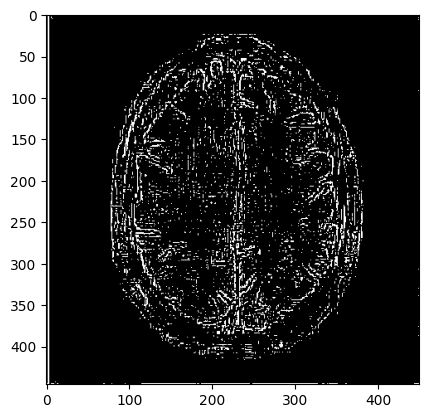

In [3]:
import numpy as np
from matplotlib import pyplot as plt

# función para aplicar una convolución 2D a una imagen
def convolucion_2d(imagen, kernel):
    # obtención de los tamaños de la imagen y el kernel
    alto, ancho = imagen.shape
    k_alto, k_ancho = kernel.shape
    
    # cálculo del borde para evitar desbordamiento
    bordeH = int((k_alto-1)/2)
    bordeW = int((k_ancho-1)/2)
    
    # creación de una matriz de ceros con tamaño ampliado
    imagen_ampliada = np.zeros((alto + bordeH*2, ancho + bordeW*2))
    imagen_ampliada[bordeH:-bordeH, bordeW:-bordeW] = imagen
    
    # creación de una matriz de ceros para almacenar los resultados
    resultado = np.zeros_like(imagen)
    
    # aplicación del kernel a cada píxel de la imagen
    for i in range(bordeH, alto+bordeH):
        for j in range(bordeW, ancho+bordeW):
            trozo = imagen_ampliada[i-bordeH:i+bordeH+1, j-bordeW:j+bordeW+1]
            resultado[i-bordeH, j-bordeW] = (trozo * kernel).sum()
    
    return resultado

# función para aplicar una umbralización a una imagen
def umbralizacion(imagen, umbral):
    # creación de una matriz de ceros con tamaño igual a la imagen
    resultado = np.zeros_like(imagen)
    # asignación de 255 o 0 según el valor del umbral
    resultado[imagen > umbral] = 255
    return resultado

# lectura de la imagen
imagen = plt.imread("yes/Y8.jpg")

# definición del kernel para la convolución
kernel = np.array([[-1, -1, -1], 
                   [-1,  8, -1], 
                   [-1, -1, -1]])

# aplicación de la convolución
convolucionada = convolucion_2d(imagen.mean(axis=2), kernel)
# aplicación de la umbralización
umbralizada = umbralizacion(convolucionada, 30)

# visualización de la imagen umbralizada
plt.imshow(umbralizada, cmap="gray")
plt.show()


In [23]:
#Elimiinar el ruido de la imagen

#Expande las areas blancas
def dilatacion(A,B):
    m, n = A.shape
    p, q = B.shape
    C = np.zeros((m, n))

    for i in range(m):
        for j in range(n):
            for k in range(p):
                for l in range(q):
                    if B[k, l] == 1 and i+k-p//2 >= 0 and i+k-p//2 < m and j+l-q//2 >= 0 and j+l-q//2 < n:
                        C[i, j] = max(C[i, j], A[i+k-p//2, j+l-q//2])
                        

    return C

#Se expaden las areas negras 
def erosion(imagen, kernel):
    altura, ancho = imagen.shape
    m, n = kernel.shape
    resultado = np.zeros((altura, ancho))
    
    for i in range(m//2, altura-m//2):
        for j in range(n//2, ancho-n//2):
            # Realizar la operación de erosión
            if (imagen[i-m//2:i+m//2+1, j-n//2:j+n//2+1] * kernel).min() >= 1:
                resultado[i, j] = 1
    
    return resultado

def abierto(A, B):
    C = erosion(A, B)
    D = dilatacion(C, B)
    return D

def cerrado(A, B):
    C = dilatacion(A, B)
    D = erosion(C, B)
    return D

def obtener_primer_pixel_blanco(matriz):
    alto, ancho = matriz.shape

    for fila in range(alto):
        for columna in range(ancho):
            if matriz[fila, columna] < 128:  # Suponiendo que 255 representa el blanco en tu imagen
                return fila, columna

    # Si no se encuentra ningún píxel blanco, se puede devolver un valor por defecto
    return None



(0, 0)


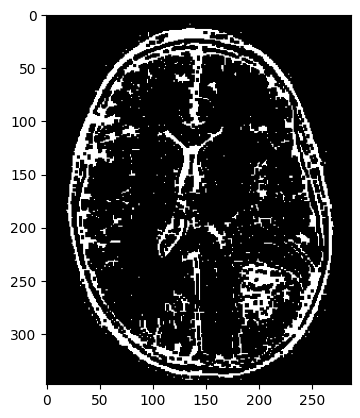

In [22]:
kernel = np.ones((3,3),np.uint8)
prueba1 =erosion(dilatacion(umbralizada,kernel),kernel)
primerBlanco = obtener_primer_pixel_blanco(prueba1)
print(primerBlanco)
plt.imshow(prueba1, cmap="gray")
plt.show()




# kernel= np.ones((3,3),np.uint8)
# prueda2 = dilatacion(erosion(umbralizada,kernel),kernel)
# plt.imshow(prueda2, cmap= "gray")
# plt.show()

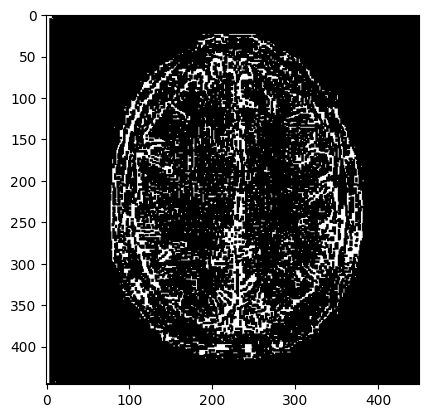

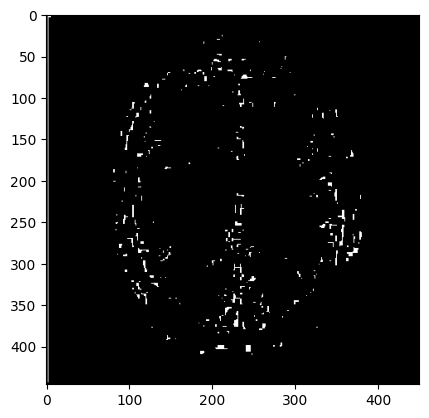

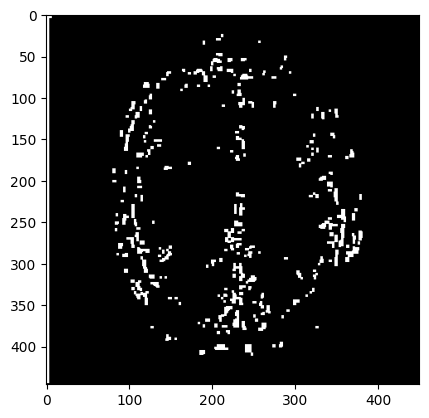

In [6]:
kernel = np.ones((3,3),np.uint8)

cierre = cerrado(umbralizada,kernel)
apertura = abierto(cierre,kernel)
plt.imshow(cierre, cmap="gray")
plt.show()

sincierre = erosion(cierre,kernel)
plt.imshow(sincierre, cmap="gray")
plt.show()


cierre = cerrado(umbralizada,kernel)
apertura = abierto(cierre,kernel)

plt.imshow(apertura, cmap="gray")
plt.show()



58


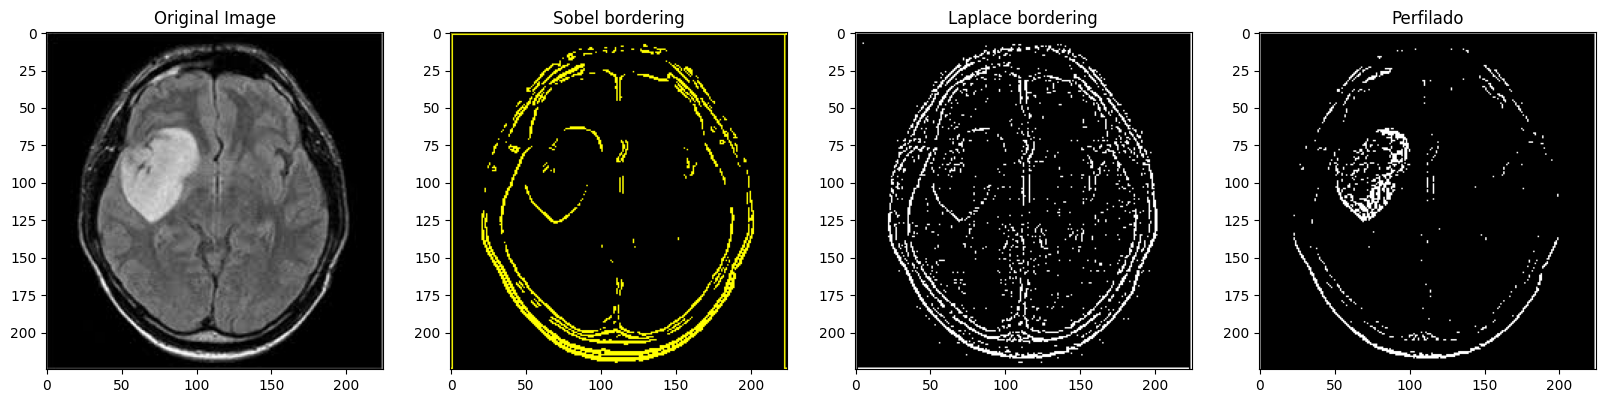

In [7]:
# kernel = np.ones((3,3),np.uint8)

# apertura = abierto(umbralizada,kernel)
# plt.imshow(apertura, cmap="gray")
# plt.show()
from math import floor
import math 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
desayuno = Image.open('yes/Y4.jpg','r')

def convolucion(img, kernel):
    kernelint = floor(kernel.shape[0]/2)
    R, G, B = 0, 1, 2
    matrizExtendidaR = np.pad(img[:, :, R], kernelint, mode='constant')
    matrizExtendidaG = np.pad(img[:, :, G], kernelint, mode='constant')
    matrizExtendidaB = np.pad(img[:, :, B], kernelint, mode='constant')
    matrixRes = np.zeros((img.shape[0], img.shape[1], img.shape[2]))
    for i in range(kernelint, matrizExtendidaR.shape[0] - kernelint):
        for j in range(kernelint, matrizExtendidaR.shape[1] - kernelint):
            sumaR, sumaG, sumaB = 0, 0, 0
            for m in range(kernel.shape[0]):
                for n in range(kernel.shape[1]):
                    sumaR = sumaR + (kernel[m][n] * matrizExtendidaR[i-kernelint+m][j-kernelint+n])
                    sumaG = sumaG + (kernel[m][n] * matrizExtendidaG[i-kernelint+m][j-kernelint+n])
                    sumaB = sumaB + (kernel[m][n] * matrizExtendidaB[i-kernelint+m][j-kernelint+n])
            matrixRes[i-kernelint][j-kernelint][R] = round(sumaR)
            matrixRes[i-kernelint][j-kernelint][G] = round(sumaG)
            matrixRes[i-kernelint][j-kernelint][B] = round(sumaB)
    return matrixRes

def laplace(img, umbral, k):
    matrixRes=(convolucion(img, k))
    matrixRes = normalize(matrixRes)
    matrixRes = thresholding(matrixRes, umbral)
    return matrixRes.astype(np.uint8)
    
def normalize (img):
    for i in range(0,2):
        for row in range(img.shape[0]):
            for column in range(img.shape[1]):
                if(img[row][column][i] > 255):
                    img[row][column][i] = 255
                if (img[row][column][i]) < 0:
                    img[row][column][i] = 0
    return img


def thresholding(D, threshold): # 0 or 255 since the threshold
    R, G, B = 0, 1, 2
    width_D, height_D, RGBD = D.shape
    thresholdImg = np.copy(D)
    for row in range(width_D):
        for column in range(height_D):
            if(D[row][column][R]>threshold):
                thresholdImg[row][column][R] = 255
            else:
                thresholdImg[row][column][R] = 0
            if(D[row][column][G]>threshold):
                thresholdImg[row][column][G] = 255
            else:
                thresholdImg[row][column][G] = 0
            if(D[row][column][B]>threshold):
                thresholdImg[row][column][B] = 255
            else:
                thresholdImg[row][column][B] = 0
    
    return thresholdImg

def factorial(x):
    return 1 if x == 0 else x * factorial(x - 1)

def triangle(n):
    return [[factorial(i) / (factorial(j) * factorial(i - j)) for j in range(i + 1)] for i in range(n)]


def kernelGauss(n):
    h = triangle(n)[n-1]
    v = np.vstack(h)
    return h*v

def kerLaplace():
    return np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]])

def kernelGaussX(n):
    kernelGaussX = kernelGauss(n)
    kernelGaussX[:,0] = kernelGaussX[:,0] * -1
    kernelGaussX[:,1] = kernelGaussX[:,1] * 0
    return kernelGaussX

def kernelGaussY(n):
    kernelGaussY = kernelGauss(n)
    kernelGaussY[0, :] = kernelGaussY[0, :] * -1
    kernelGaussY[1, :] = kernelGaussY[1, :] * 0
    return kernelGaussY

def sobel(img, n, umbral):
    matrixRes = np.zeros((img.shape[0], img.shape[1], img.shape[2]))
    matrixResX = (convolucion(img, kernelGaussX(n)))
    matrixResY = (convolucion(img, kernelGaussY(n)))
    
    for i in range(0,2):
        for x in range(img.shape[0]):
            for y in range(img.shape[1]):
                matrixRes[x][y][i] = math.sqrt(matrixResX[x][y][i]**2 + matrixResY[x][y][i] **2)
    #muestra de la capa X y la capa Y
    '''         
    matrixResY = thresholding(matrixResY, umbral-200)
    matrixResX = thresholding(matrixResX, umbral-200)
    fig, axs = plt.subplots(1,3,figsize=(20, 5))
    axs[0].imshow(matrixResX.astype(np.uint8))
    axs[0].set_title("Gauss X")
    axs[1].imshow(matrixResY.astype(np.uint8))
    axs[1].set_title("Gauss Y")
    axs[2].imshow(matrixRes.astype(np.uint8))
    axs[2].set_title("Sobel bordering")
    '''
    matrixRes = normalize(matrixRes)
    matrixRes = thresholding(matrixRes, umbral)
    return matrixRes.astype(np.uint8)

def perfilado(img,n,a, umbral):
    kernelPerf =np.array([[0, -a, 0], [-a, (n*a)+1, -a], [0, -a, 0]])  
    matrixRes = convolucion(img, kernelPerf)
    matrixRes = normalize(matrixRes)
    matrixRes = thresholding(matrixRes, umbral)
    return matrixRes.astype(np.uint8)

def thresholdOtsu(img): #min(weightB*VarianceB + weightF*VarianceF)
    #Histogram
    hist = np.zeros(256)
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            hist[img[row][column][0]] += 1
    
    pixelesInImg = img.shape[0]*img.shape[1]
    WCVList = []

    #Algorithm
    for threshold in range(len(hist)):
        #b where hist < threshold
        b = hist[:threshold]
        #Weight b
        w_b = sum(b)/(pixelesInImg)
        #Mean b
        m = 0
        for i in range(threshold):
            m += (i*hist[i])
        if(sum(b)==0):
            m_b = 0
        else:
            m_b = m/sum(b)
        #Variance b
        v = 0
        for i in range(threshold):
            v += ((i-m_b)**2) * hist[i]
        if(sum(b)==0):
            v_b = 0
        else:
            v_b = v/sum(b)

        #f where hist >= threshold
        f = hist[threshold:]
        #Weight f
        w_f = sum(f)/(pixelesInImg)
        #Mean f
        m = 0
        for i in range(threshold, len(hist)):
            m += (i*hist[i])
        m_f = m/sum(f)
        #Variance f
        v = 0
        for i in range(threshold, len(hist)):
            v += ((i-m_f)**2) * hist[i]
        v_f = v/sum(f)
        #Within_class_variance
        WCV = (w_b*v_b)+(w_f*v_f)
        WCVList.append(WCV)
        
    t = WCVList.index(min(WCVList))
    
    return t #The rigth threshold

laplaceImg = laplace(np.array(desayuno), 70, kerLaplace())
sobelImg = sobel(np.array(desayuno),3, 250)
umbral = thresholdOtsu(np.array(desayuno))
print(umbral)
perfiladoImg = perfilado(np.array(desayuno),4, 1, 255-umbral)

fig, axs = plt.subplots(1,4,figsize=(20, 5))
axs[0].imshow(np.array(desayuno))
axs[0].set_title("Original Image")
axs[1].imshow(sobelImg)
axs[1].set_title("Sobel bordering")
axs[2].imshow(laplaceImg)
axs[2].set_title("Laplace bordering")
axs[3].imshow(perfiladoImg)
axs[3].set_title("Perfilado")
plt.show()

In [8]:
def unocanalporcentaje(imgarr):
    height, width, canal = imgarr.shape
    gris = np.zeros((height,width))

    for h in range(height):
        for w in range(width):
            gris[h][w] = (imgarr[h][w][0] * 0.21) + (imgarr[h][w][1] * 0.72) + (imgarr[h][w][2] * 0.07)
    
    return gris

def unocanalpromedio(imgarr):
    height, width, canal = imgarr.shape
    gris = np.zeros((height,width))

    for h in range(height):
        for w in range(width):
            gris[h][w] = (imgarr[h][w][0] + imgarr[h][w][1] + imgarr[h][w][2] )//3
    
    return gris

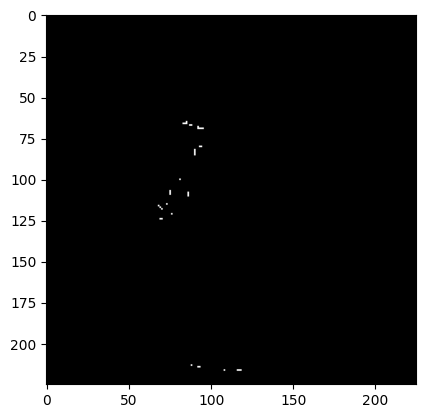

In [9]:
kernel = np.ones((3,3),np.uint8)
perfil = unocanalporcentaje(perfiladoImg)
prueba1 =erosion(abierto(perfil,kernel),kernel)
plt.imshow(prueba1, cmap="gray")
plt.show()

C:\Users\nanga\AppData\Local\Temp\ipykernel_25632\451910502.py:17: RuntimeWarning: overflow encountered in scalar add
  gris[h][w] = (imgarr[h][w][0] + imgarr[h][w][1] + imgarr[h][w][2] )//3


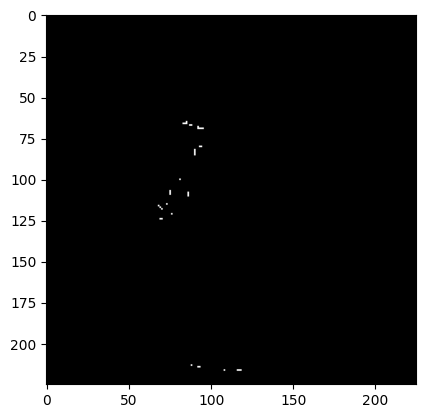

None


In [24]:
kernel = np.ones((3,3),np.uint8)
perfil = unocanalpromedio(perfiladoImg)
prueba1 =erosion(abierto(perfil,kernel),kernel)
plt.imshow(prueba1, cmap="gray")
plt.show()

def obtener_primer_pixel_blanco(matriz):
    alto, ancho = matriz.shape

    for fila in range(alto):
        for columna in range(ancho):
            if matriz[fila, columna] == 255:  # Suponiendo que 255 representa el blanco en tu imagen
                return fila, columna

    # Si no se encuentra ningún píxel blanco, se puede devolver un valor por defecto
    return None

primerBlanco = obtener_primer_pixel_blanco(prueba1)
print(primerBlanco)

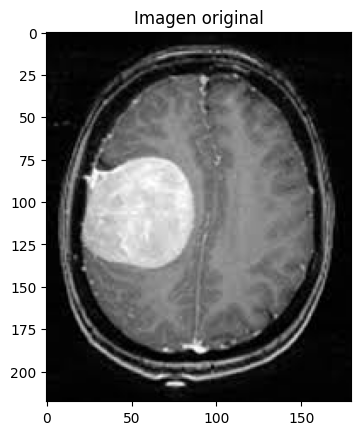

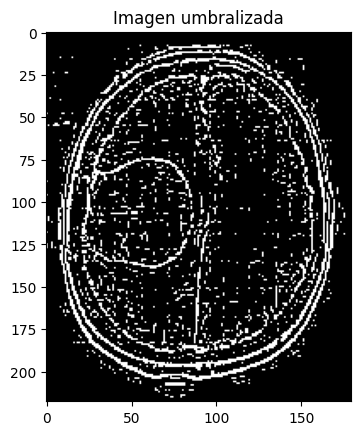

valores de la imagen original
minAncho:  82
maxAncho:  187
minAlto:  27
maxAlto:  88


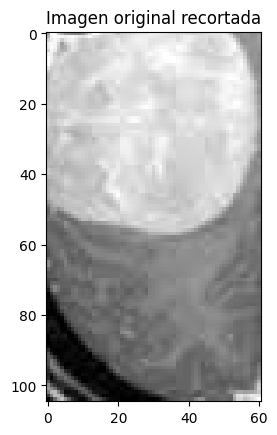

valores de la imagen umbralizada
minAncho:  8
maxAncho:  215
minAlto:  0
maxAlto:  175


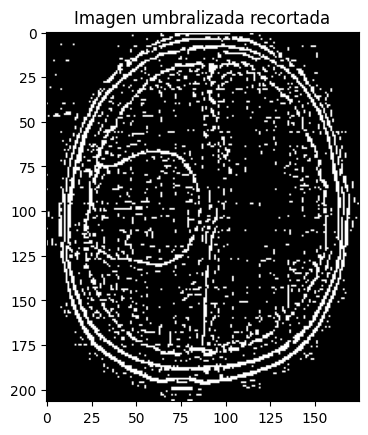

In [25]:
import numpy as np
from matplotlib import pyplot as plt

# lectura de la imagen
imagen = plt.imread("yes/Y1.jpg")

# visualización de la imagen original
plt.imshow(imagen)
plt.title('Imagen original')
plt.show()

# función para aplicar una convolución 2D a una imagen
def convolucion_2d(imagen, kernel):
    # obtención de los tamaños de la imagen y el kernel
    alto, ancho = imagen.shape
    k_alto, k_ancho = kernel.shape
    
    # cálculo del borde para evitar desbordamiento
    bordeH = int((k_alto-1)/2)
    bordeW = int((k_ancho-1)/2)
    
    # creación de una matriz de ceros con tamaño ampliado
    imagen_ampliada = np.zeros((alto + bordeH*2, ancho + bordeW*2))
    imagen_ampliada[bordeH:-bordeH, bordeW:-bordeW] = imagen
    
    # creación de una matriz de ceros para almacenar los resultados
    resultado = np.zeros_like(imagen)
    
    # aplicación del kernel a cada píxel de la imagen
    for i in range(bordeH, alto+bordeH):
        for j in range(bordeW, ancho+bordeW):
            trozo = imagen_ampliada[i-bordeH:i+bordeH+1, j-bordeW:j+bordeW+1]
            resultado[i-bordeH, j-bordeW] = (trozo * kernel).sum()
    
    return resultado

# función para aplicar una umbralización a una imagen
def umbralizacion(imagen, umbral):
    # creación de una matriz de ceros con tamaño igual a la imagen
    resultado = np.zeros_like(imagen)
    
    # asignación de 255 o 0 según el valor del umbral
    resultado[imagen > umbral] = 255
    
    return resultado


# definición del kernel para la convolución
kernel = np.array([[-1, -1, -1], 
                   [-1,  8, -1], 
                   [-1, -1, -1]])

# aplicación de la convolución
convolucionada = convolucion_2d(imagen.mean(axis=2), kernel)

umbral = thresholdOtsu(np.array(imagen))
print(umbral)

# aplicación de la umbralización
umbralizada = umbralizacion(convolucionada, 40)

# visualización de la imagen umbralizada
plt.imshow(umbralizada, cmap="gray")
plt.title('Imagen umbralizada')
plt.show()



#recorremos la imagen original para encontrar maximos y minimos de ancho y alto
minAncho = 1000
maxAncho = 0
minAlto = 1000
maxAlto = 0
for i in range(0, imagen.shape[0]):
    for j in range(0, imagen.shape[1]):
        if(imagen[i][j][0] == 255):
            if(i < minAncho):
                minAncho = i
            if(i > maxAncho):
                maxAncho = i
            if(j < minAlto):
                minAlto = j
            if(j > maxAlto):
                maxAlto = j

#imprimos los valores maximas y minimos de ancho y alto
print ("valores de la imagen original")
print("minAncho: ", minAncho)
print("maxAncho: ", maxAncho)
print("minAlto: ", minAlto)
print("maxAlto: ", maxAlto)

#recortamos la imagen
imagen = imagen[minAncho:maxAncho, minAlto:maxAlto]

#mostramos la imagen recortada
plt.imshow(imagen)
plt.title('Imagen original recortada')
plt.show()



#recorremos la imagen umbralizada para encontrar maximos y minimos de ancho y alto
minAncho = 1000
maxAncho = 0
minAlto = 1000
maxAlto = 0
for i in range(0, umbralizada.shape[0]):
    for j in range(0, umbralizada.shape[1]):
        if(umbralizada[i][j] == 255):
            if(i < minAncho):
                minAncho = i
            if(i > maxAncho):
                maxAncho = i
            if(j < minAlto):
                minAlto = j
            if(j > maxAlto):
                maxAlto = j

#imprimos los valores maximas y minimos de ancho y alto
print("valores de la imagen umbralizada")
print("minAncho: ", minAncho)
print("maxAncho: ", maxAncho)
print("minAlto: ", minAlto)
print("maxAlto: ", maxAlto)

#recortamos la imagen
umbralizada = umbralizada[minAncho:maxAncho, minAlto:maxAlto]

#mostamos la imagen recortada
plt.imshow(umbralizada, cmap="gray")
plt.title('Imagen umbralizada recortada')
plt.show()